In [1]:
fig_dir = "../../figures"
fig_ext = "pdf"

In [2]:
#import astropy.units as u
import numpy as np
import astropy.units as u

import matplotlib.pyplot as plt
#plt.style.use("/home/daniel/thesis/thesis-style.mpl")

import thesis

In [5]:
! pip install pyyaml

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
     |████████████████████████████████| 276kB 3.3MB/s eta 0:00:01
  Stored in directory: /home/daniel/.cache/pip/wheels/16/27/a1/775c62ddea7bfa62324fd1f65847ed31c55dadb6051481ba3f
Successfully built pyyaml


In [6]:
import gwinc
import numpy as np

In [16]:
freq = np.logspace(1, 5, 10000)
ifo = gwinc.load_ifo('aLIGO')
ifo = gwinc.precompIFO(freq, ifo)
#noises = gwinc.noise_calc(freq, ifo)
#gwinc.plot_noise(ifo, noises)


In [17]:
freqs = np.logspace(0,5, 10000)

In [18]:
noises = gwinc.noise_calc(freqs, ifo)

In [19]:
strain_unit = u.hertz**-0.5

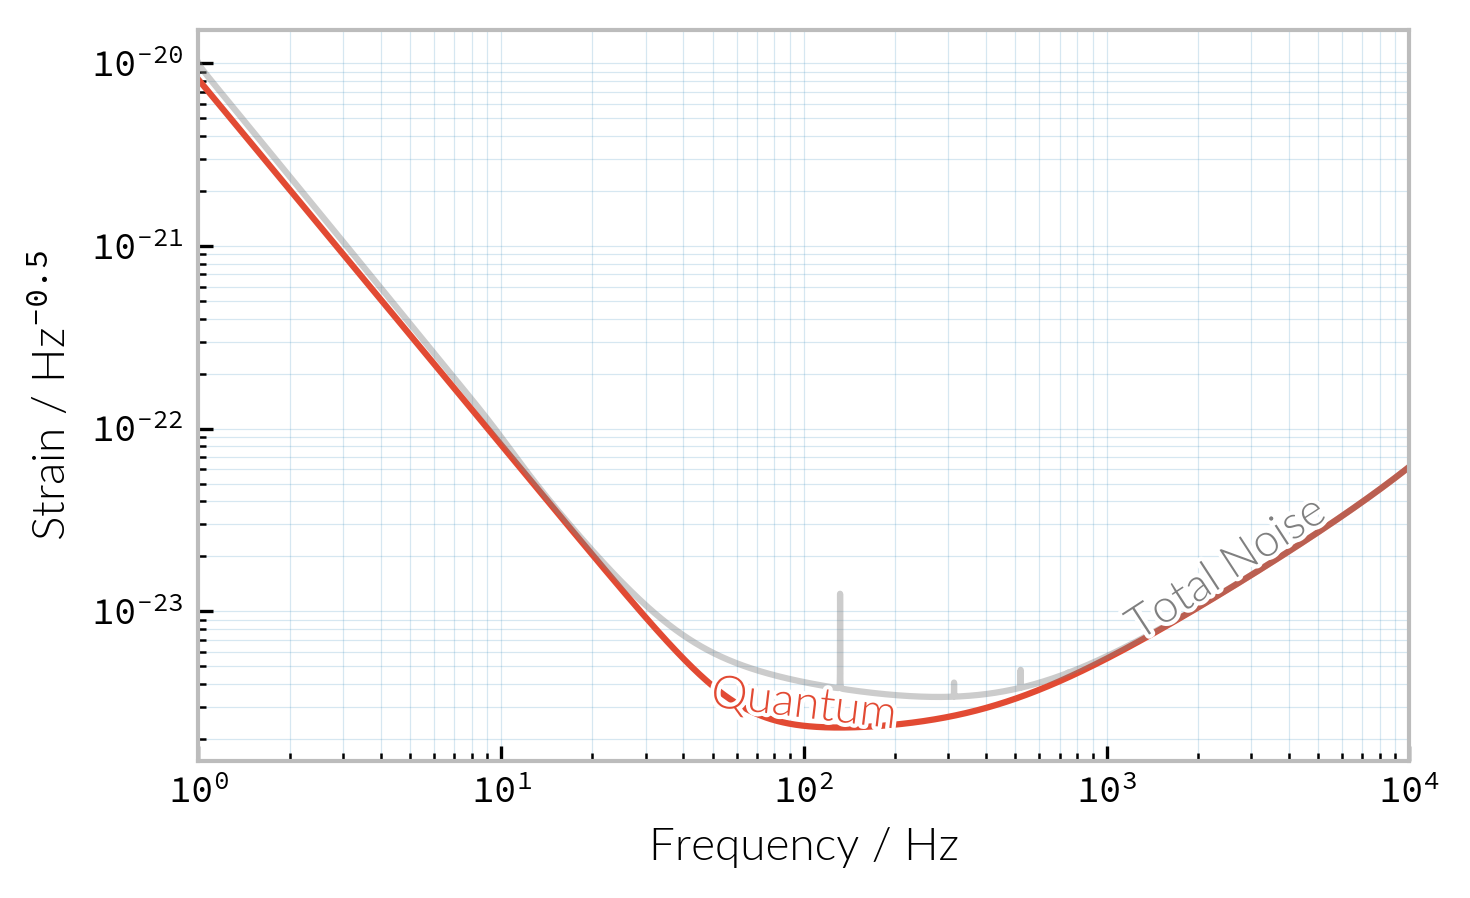

In [34]:
f, ax = plt.subplots(1,1, dpi=300)
qvacuum_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Quantum Vacuum']*strain_unit))
ax.set_xlim(0,1e4)

ax.set_ylabel("Strain / Hz$^{-0.5}$")
ax.set_xlabel("Frequency / Hz")

total_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Total'])*strain_unit, color='gray', alpha=0.4)
thesis.labelLine(total_line[0], x=2500, label="Total Noise", yshift=1.3)

thesis.labelLine(qvacuum_line[0], x=100, label="Quantum", yshift=1.3)

f = thesis.thesisify(f)

f.savefig("{}/intro/quantum-noise.{}".format(fig_dir, fig_ext))

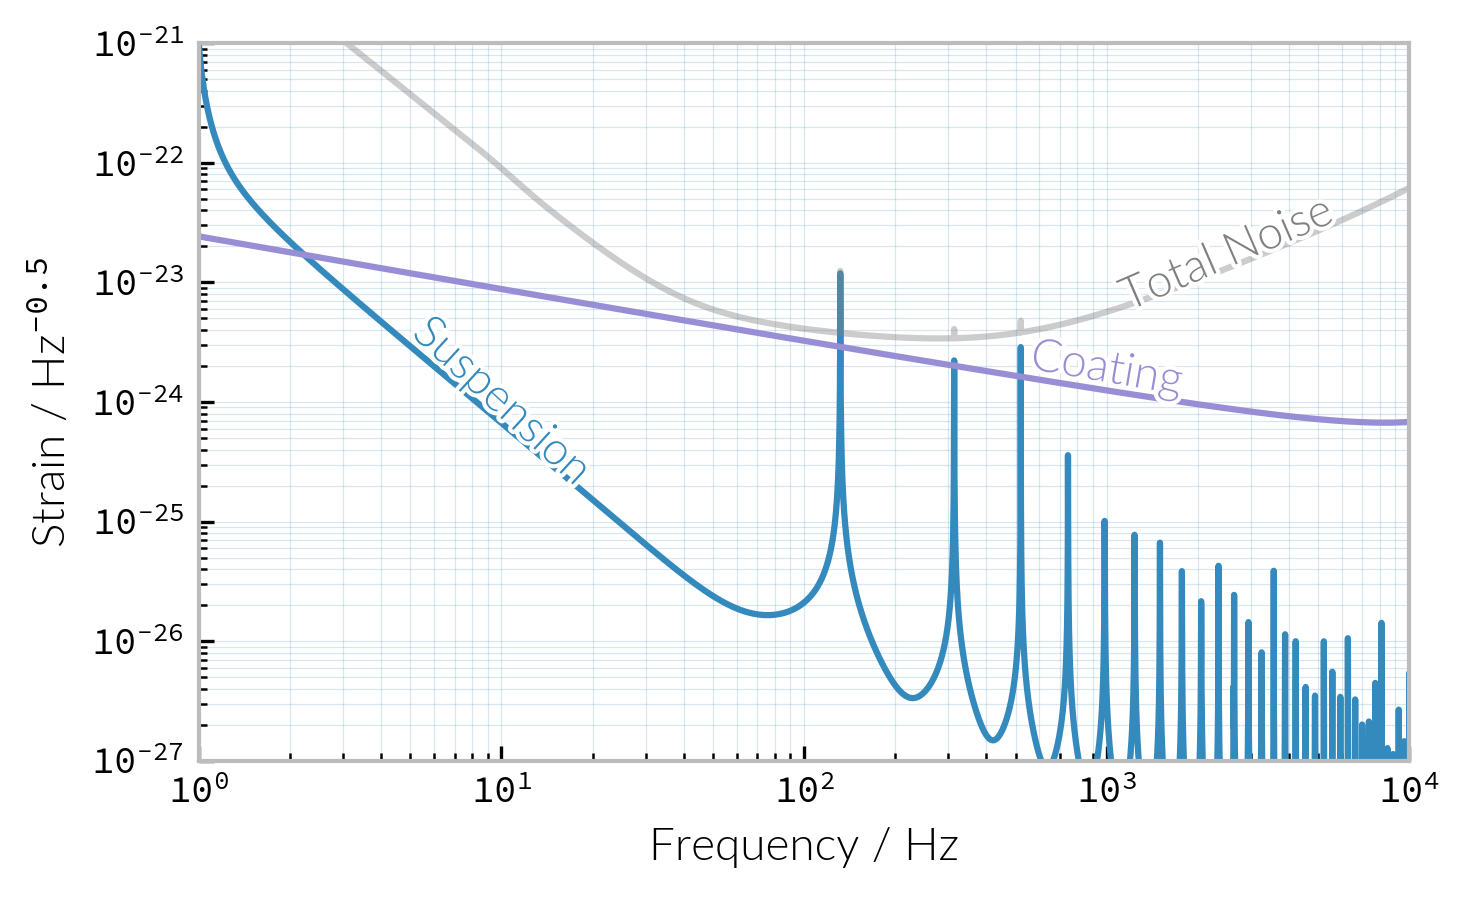

In [33]:
f, ax = plt.subplots(1,1, dpi=300)
sustherm_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Suspension Thermal']*strain_unit), color=thesis.colors['blue'])
coating_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Coating Brownian']*strain_unit), color=thesis.colors['purple'])
ax.set_xlim(0,1e4)
ax.set_ylim([1e-27, 1e-21])
ax.set_ylabel("Strain / Hz$^{-0.5}$")
ax.set_xlabel("Frequency / Hz")

total_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Total'])*strain_unit, color='gray', alpha=0.4)
thesis.labelLine(total_line[0], x=2500, label="Total Noise", yshift=1.3)

thesis.labelLine(sustherm_line[0], x=10, label="Suspension", yshift=1.5)
thesis.labelLine(coating_line[0], x=1000, label="Coating", yshift=1.5)
f = thesis.thesisify(f)

f.savefig("{}/intro/thermal-noise.{}".format(fig_dir, fig_ext))

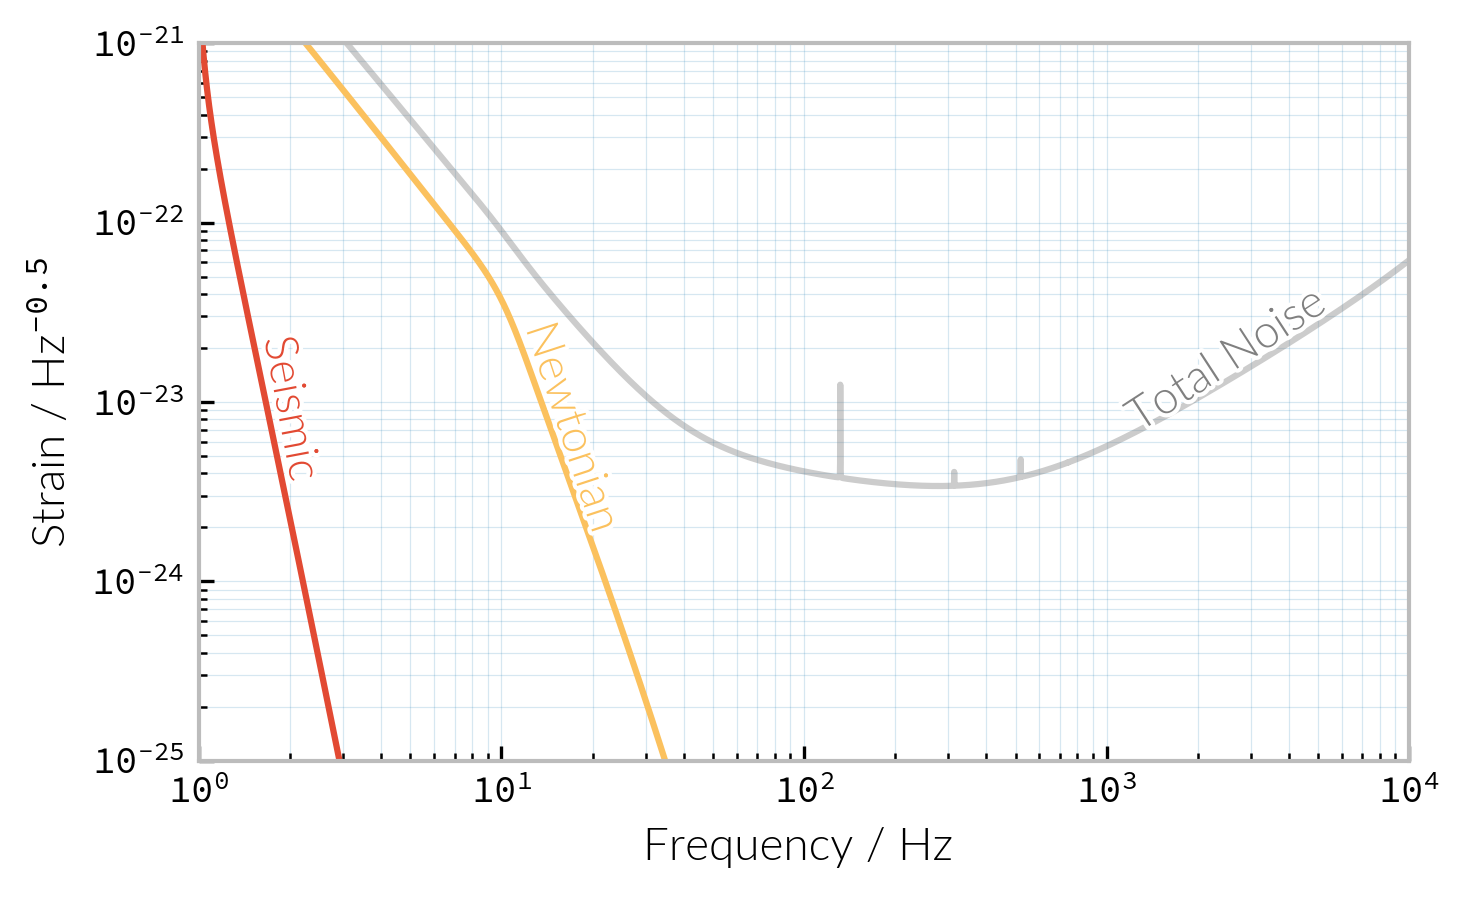

In [32]:
f, ax = plt.subplots(1,1, dpi=300)
sustherm_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Newtonian Gravity']*strain_unit), color=thesis.colors['yellow'])
coating_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Seismic']*strain_unit), color=thesis.colors['red'])
ax.set_xlim(0,1e4)
ax.set_ylim([1e-25, 1e-21])
ax.set_ylabel("Strain / Hz$^{-0.5}$")
ax.set_xlabel("Frequency / Hz ")

total_line = ax.loglog(freqs*u.hertz, np.sqrt(noises['Total'])*strain_unit, color='gray', alpha=0.4)
thesis.labelLine(total_line[0], x=2500, label="Total Noise", yshift=1.3)

thesis.labelLine(sustherm_line[0], x=17, label="Newtonian", yshift=2.1)
thesis.labelLine(coating_line[0], x=2, label="Seismic", yshift=4.1)
f = thesis.thesisify(f)

f.savefig("{}/intro/gravity-noise.{}".format(fig_dir, fig_ext))